머신러닝 3가지 학습 방법
1. Supervised(지도학습)
- regression(회귀) : 예측
    - linear : 많이 사용. 효율 좋아. 딥러닝에서도 많이 사용
        - knn-회귀의 경우 이웃하지 않으면 예측할 수 없는 문제점이 있어서 많이 사용하지는 않지만 가장 기초적인 방법
    - polynomial
- decision tree(결정)
- random forest
- classification(분류) : 정답
    - knn
    - trees
    - logistic regression
    - naice-bayes
    - svm
2. unsupervised(비지도학습)
- clustring
    - svd
    - pca
    - k-means
- association analysis
    - apriori
    - fp-growth
- hidden markov model
3. Reinforcement(강화학습) : 알파고

In [384]:
from sklearn import svm, metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor # 회귀-예측
from sklearn.model_selection import train_test_split 
                                    # train_test_split : train data, test data를 나누는 함수
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글설정
matplotlib.rcParams['font.size'] = 10 # 글자크기
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호(-) 표기

In [385]:
# pandas
# perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
#      21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
#      22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
#      27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
#      36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
#      40.0, 42.0, 43.0, 43.0, 43.5, 44.0]

# perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
#      110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
#      130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
#      197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
#      514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
#      820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
#      1000.0, 1000.0]

# df = pd.DataFrame([perch_length,perch_weight])
# df = df.T # 행렬전환
# df

In [386]:
# numpy 구조로 변환(numpy로 묶기)
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
    )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
    )
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

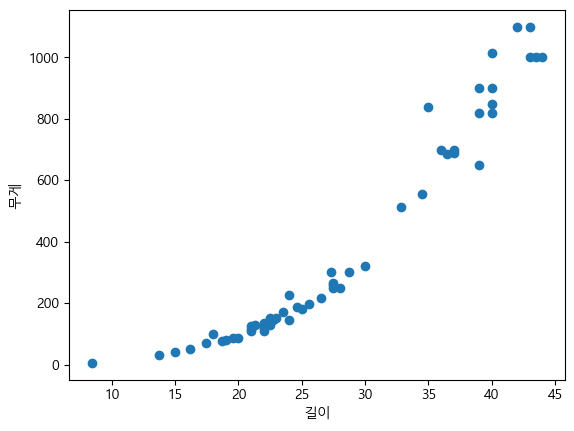

In [387]:
# 산점도로 출력하시오.
# x축은 길이(df[0]), y축은 무게(df[1])
# plt.scatter(df[0], df[1], label='perch', color='lavender')
plt.scatter(perch_length, perch_weight)
# plt.legend(loc=0)
plt.xlabel("길이")
plt.ylabel("무게")


plt.show()

머신러닝 구현
1. 데이터 전처리 : NaN 값 및 0 값 처리, 단위처리, 훈련 및 테스트 세트 분리
2. 데이터 학습하기
3. 데이터 예측하기 - 평균 절대값 오차
4. 예측값 구하기 ==> 정답은 아니야. 오차의 범위

In [388]:
# 1. 데이터 전처리 : NaN 값 및 0 값 처리, 단위처리, 훈련 및 테스트 세트 분리
    # 0 값은 없어.==> 그래프로 확인
    # NaN 값은 df.info()로 확인  ==> RangeIndex: 56 entries, 0, 1 컬럼 모두 56 non-null이므로 NaN 값 없어
    # 훈련 및 테스트 세트 분리
# train_input, test_input, train_target, test_target = train_test_split(df[0], df[1])
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)
train_input

array([22. , 21. , 15. , 27.3, 24.6, 28. , 26.5, 21. , 32.8,  8.4, 21.3,
       35. , 23.5, 25. , 25.6, 13.7, 22.5, 27.5, 24. , 28.7, 22.7, 22. ,
       17.4, 27.5, 23. , 43.5, 20. , 24. , 19.6, 42. , 22. , 40. , 18.7,
       21. , 34.5, 18. , 39. , 43. , 36. , 40. , 44. , 37. ])

In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       56 non-null     float64
 1   1       56 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [390]:
# 총 개수 : 56
train_input.shape # (42,) ==> 1차원 구조
# test_input.shape # (14,)

(42,)

In [391]:
arr1 = np.array([1,2,3,4]) # 1차원
arr1 = arr1.reshape(2,2) # 2차원
arr1
# [1,2,3,4] ==> [[1, 2],[3, 4]] 로 바뀜

array([[1, 2],
       [3, 4]])

In [392]:
arr1 = np.array([1,2,3,4,5,6]) # 1차원
arr1 = arr1.reshape(2,3) # 2차원
arr1
# [1,2,3,4] ==> [[1, 2, 3],[4, 5, 6]] 로 바뀜

array([[1, 2, 3],
       [4, 5, 6]])

In [393]:
# .reshape() : 행렬의 모양을 결정
arr1 = np.array([1,2,3,4]) # 1차원, numpy 행렬로 변환
arr1 = arr1.reshape(-1, 1) # 2차원
arr1 = arr1.reshape(4, 1) # 위의 행과 동일 
# (-1, 1) 앞의 숫자는 모든을 의미
arr1
# [1,2,3,4] ==> [[1],[2],[3],[4]] 로 바뀜

array([[1],
       [2],
       [3],
       [4]])

In [394]:
# 알고리즘 구현을 위한 2차원 행렬로 변경, 특성이 2개 이상 들어가면 할 필요 없어. 하나의 특성만 있어서 이렇게 바꾸는 거야. 
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [395]:
train_input.shape # (42, 1) ==> 2차원 구조
test_input.shape # (14, 1)

(14, 1)

In [396]:
# 2. 데이터 학습하기

# 데이터 학습시키기
knr = KNeighborsRegressor()
knr.fit(train_input, train_target) # ==> error, pandas 말고 numpy로


KNeighborsRegressor()

In [397]:
# 3. 데이터 예측하기

# 예측의 오차 범위 : 절대값 오차 
from sklearn.metrics import mean_absolute_error # 평균의 +- 오차
predict = knr.predict(test_input)
# 무게 예측
print('예측값 : ', predict)

예측값 :  [ 129.   937.   687.2  258.6  129.   937.  1043.   855.    83.6  275.
   64.   687.2  133.   855. ]


In [398]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [399]:
# 실제값과 예측한 값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target, predict) 
print('오차범위 : ', test_mean)

오차범위 :  26.692857142857147


In [400]:
# 4. 예측값 구하기 ==> 정답은 아니야. 오차의 범위

# 예측룰 측정하기 : test_input으로 데이터 검증
score = knr.score(test_input, test_target)
print('예측률 : ', score) # 0.990958062642437 ==> run 할 때마다 바뀜

예측률 :  0.990190078787231


In [401]:
# 실제 train 데이터의 예측률은 어느 정도 나오는지 확인
score2 = knr.score(train_input, train_target)
print("train 예측률 : ", score2)

train 예측률 :  0.9704320049366466


test 예측률이 train 예측률 보다 낮으면, 문제가 있음. ==> 조정 필요
과대적합/과소적합 판단 후 조정 필요

과대적합 : n_neighbor 높임
과소적합 : train_target < test_target  == > n_neighbor(이웃 개수) 낮춤
n_neighbor = 3 기본이 5인데 3으로 변경
n이 많으면 값이 작아져서 과소 적합 ==> n을 줄이면 값이 높이지니까 n_nighbor 축소

==> KNN 회귀분석을 통해 농어에 대한 무게를 예측하는 프로그램 구현

n_neighbor 변경(줄이기)

그래프 구성 ==> 특성값이 하나일 때 그릴 수 있어, 특성값이 2개 이상일 때는 예측률로 확인

In [402]:
# 과소적합(test 예측률 > train 예측룰)
score2 = knr.score(train_input, train_target)
print("train 예측률 : ", score2)
score = knr.score(test_input, test_target)
print('예측률 : ', score) # 0.990958062642437 ==> run 할 때마다 바뀜

train 예측률 :  0.9704320049366466
예측률 :  0.990190078787231


In [403]:
# 이웃의 개수를 축소 : 5에서 3으로 변경 ==> 과소적합의 부분 문제를 해결 (test예측률 < train 예측률)
# 과소적합은 n_neighbor 낮춤
# 과대적합은 n_neighbor 높임
knr.n_neighbors = 3
# 데이터 훈련 다시 시키기
knr.fit(train_input, train_target)
# train 데이터 예측
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

0.9707721951833541
0.9868406385305203


In [404]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [405]:
len(perch_length)

56

In [406]:
# numpy로 만들기
# np.arange(4, 45)
# np.arange(5, 45).reshape(-1,1)

arr = [[i] for i in range(5,45+1)] # x축의 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

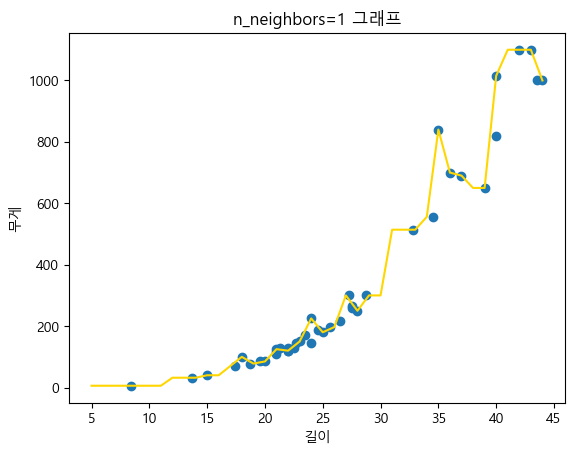

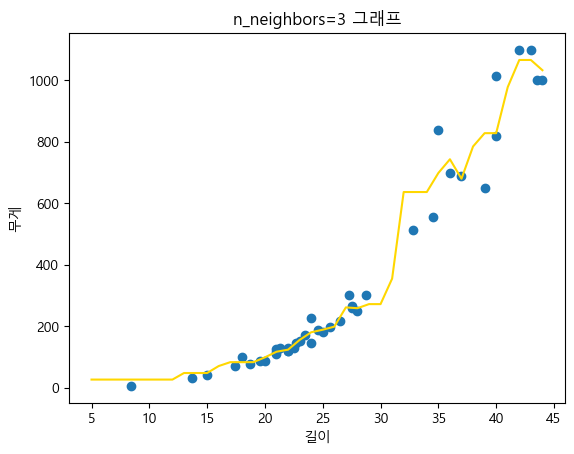

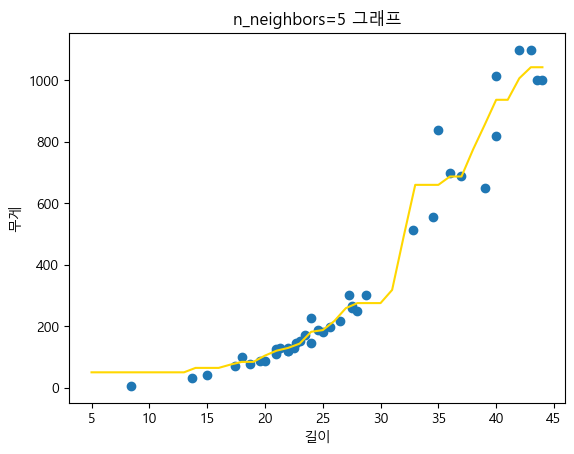

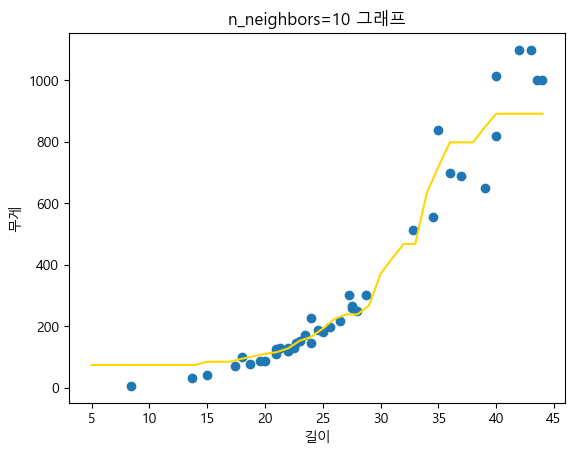

In [407]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1) # 5, 6, 7, ..., 45
for n in [1, 3, 5, 10]: # n_neighbors가 1, 5, 10일 때의 값 활용하여 예측률을 그래프로 표시
    knr.n_neighbors = n
    # 데이터 훈련 다시 시키기
    knr.fit(train_input, train_target)
    
    # 배열로 만든 길이를 가지고 예측 무게 산출
    predict = knr.predict(x)
    
    # 훈련 세트의 값을 먼저 출력
    plt.scatter(train_input, train_target)
    plt.plot(x,predict, color='gold')
    plt.title(f'n_neighbors={n} 그래프')
    plt.xlabel("길이")
    plt.ylabel("무게")
    plt.show()
    